In [ ]:
pip install opencv-python numpy scipy scikit-image torch matplotlib Pillow

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [1]:
import cv2
import numpy as np
import scipy
import skimage
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Importing necessary libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage.draw import circle_perimeter

# Load and preprocess the image


In [31]:
image = data.coins()
image = filters.gaussian(image, sigma=1)

# Display the original image


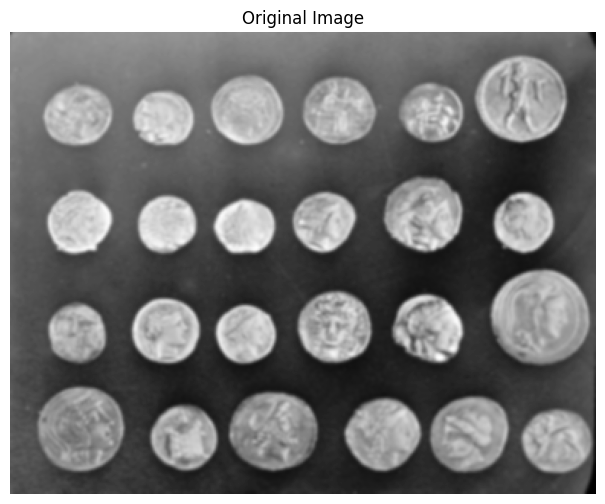

In [32]:
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Initialize the snake (active contour)
# Initial contour: a circle around the object of interest

In [38]:
s = np.linspace(0, 2*np.pi, 400)
x = 200 + 130*np.cos(s)
y = 150 + 130*np.sin(s)
init = np.array([x, y]).T

# Visualize the initial contour on the image


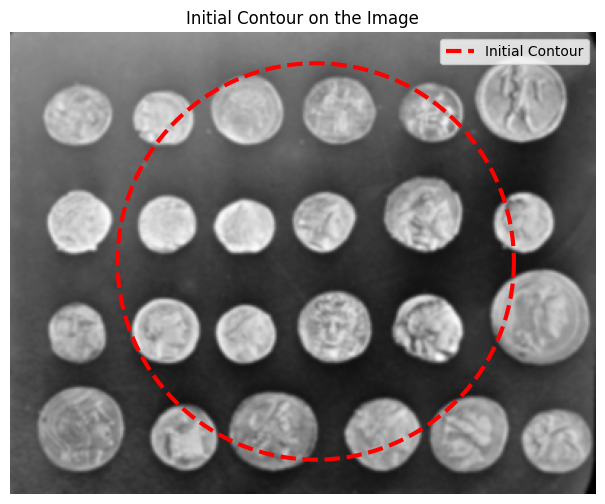

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(image, cmap='gray')
ax.plot(init[:, 0], init[:, 1], '--r', lw=3, label='Initial Contour')
ax.set_title('Initial Contour on the Image')
ax.axis('off')
ax.legend()
plt.show()

# Apply the Active Contour Model (Snake)


In [40]:
snake = active_contour(
    image,
    init,
    alpha=0.015,      # Internal energy - smoothness of the contour
    beta=10,       # Internal energy - elasticity of the contour
    gamma=0.001,     # Time step size
    max_num_iter=250 # Changed 'max_iterations' to 'max_num_iter'
)

# Visualize the final contour on the image

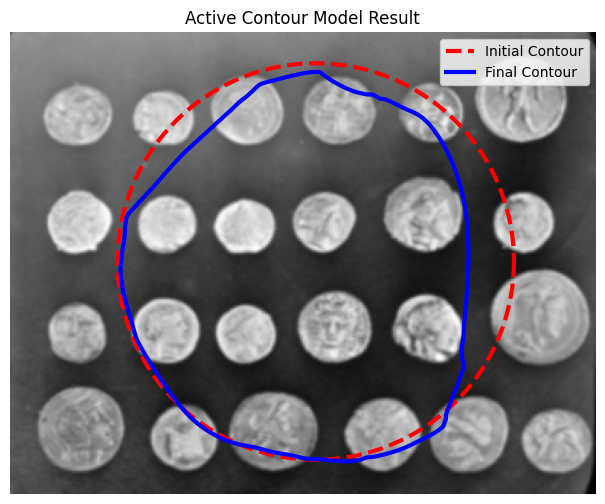

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(image, cmap='gray')
ax.plot(init[:, 0], init[:, 1], '--r', lw=3, label='Initial Contour')
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3, label='Final Contour')
ax.set_title('Active Contour Model Result')
ax.axis('off')
ax.legend()
plt.show()

# Visualizing Energy Components (Internal vs External)


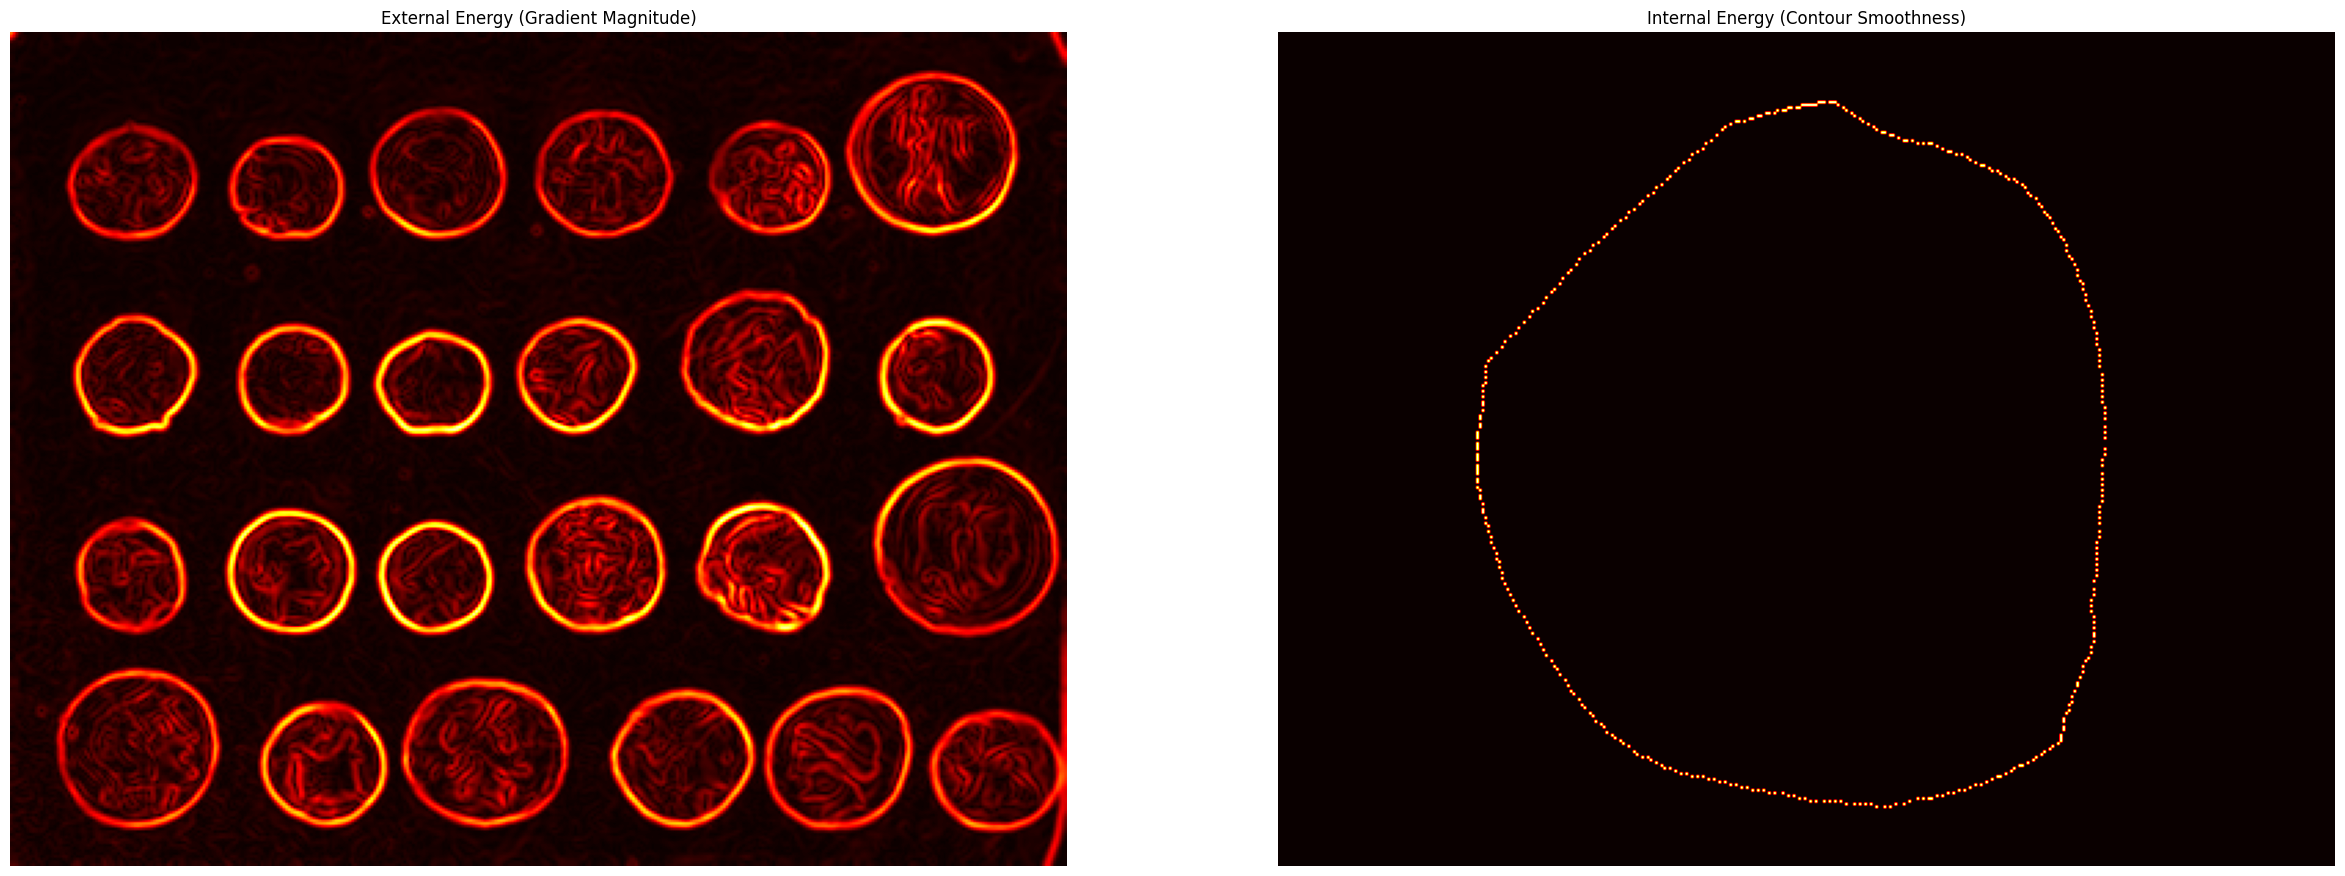

In [42]:
def plot_energy_components(image, contour):
    # Gradient magnitude (External Energy)
    grad_mag = np.gradient(image)
    grad_energy = np.sqrt(grad_mag[0]**2 + grad_mag[1]**2)

    # Internal Energy - Smoothness and Elasticity
    internal_energy = np.zeros_like(image)
    for i in range(len(contour) - 1):
        internal_energy[int(contour[i, 1]), int(contour[i, 0])] = 1

    fig, axs = plt.subplots(1, 2, figsize=(30, 12))

    axs[0].imshow(grad_energy, cmap='hot')
    axs[0].set_title('External Energy (Gradient Magnitude)')
    axs[0].axis('off')

    axs[1].imshow(internal_energy, cmap='hot')
    axs[1].set_title('Internal Energy (Contour Smoothness)')
    axs[1].axis('off')

    plt.show()

# Plot energy components
plot_energy_components(image, snake)

#Explanation of the Code:
Image Loading and Preprocessing: A sample image (coins) is loaded and smoothed using Gaussian filtering to reduce noise.

Initialization: A circular contour is initialized around the object of interest. This contour serves as the starting point for the Active Contour Model.

Active Contour Application: The active_contour function from scikit-image is used to evolve the contour by minimizing the combined internal and external energy.

Energy Visualization:

External Energy: Visualized as the gradient magnitude of the image. Edges have higher gradient values, attracting the contour.

Internal Energy: Depicted as the smoothness of the contour. Ensures the contour remains smooth during evolution.